# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

I used a two-sample t-test for this problem. Central Limit Theorem would apply because the data is relatively normal and the sample size is large enough to approximate the population.

HO: The difference in the callback rate for black and white sounding names are not statistically significant. HA: The difference in the callback rate for black and white sounding names is statistically significant.

In [1]:
# Importing the Libraries and data
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

df =  pd.read_stata('us_job_market_discrimination.dta')

In [2]:
# Differentiating between race
race_df = df[['race', 'call']]
race_df_black = race_df[race_df.race == 'b']
race_df_white = race_df[race_df.race == 'w']

In [3]:
# To calculate a variance
def calc_variance_black(ilist):
    variance = 0
    for item in ilist:
        variance = variance + (mean_df_black - item) ** 2
    return variance / len(ilist)

In [4]:
# Quick check to determine if the black data is normal
race_df_black_call = race_df_black.call
print 'If data is normal, the mean, median, and mode will all be equal'
mean_df_black = race_df_black_call.mean()
median_df_black = race_df_black_call.median()
mode_df_black = float(race_df_black_call.mode())
variance_black = calc_variance_black(race_df_black_call)
std_dev_black = math.sqrt(variance_black)

print 'The mean is %s' % (mean_df_black)
print 'The median is %s' % (median_df_black)
print 'The mode is %s' % (mode_df_black)
print 'The variance is %s' % (variance_black)
print 'The standard deviation is %s' % (std_dev_black)

If data is normal, the mean, median, and mode will all be equal
The mean is 0.0644763857126
The median is 0.0
The mode is 0.0
The variance is 0.0603191816806
The standard deviation is 0.245599636972


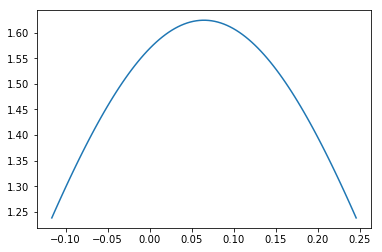

In [5]:
# Plotting black distribution
mu_black = float(mean_df_black)
x_black = np.linspace(mu_black-3*variance_black, mu_black+3*variance_black, 100)
plt.plot(x_black, mlab.normpdf(x_black, mu_black, std_dev_black))
plt.show()

In [6]:
# To calculate a variance
def calc_variance_white(ilist):
    variance = 0
    for item in ilist:
        variance = variance + (mean_df_white - item) ** 2
    return variance / len(ilist)

In [7]:
# Quick check to determine if the white data is normal
race_df_white_call = race_df_white.call
print 'If data is normal, the mean, median, and mode will all be equal'
mean_df_white = race_df_white_call.mean()
median_df_white = race_df_white_call.median()
mode_df_white = float(race_df_white_call.mode())
variance_white = calc_variance_white(race_df_white_call)
std_dev_white = math.sqrt(variance_white)

print 'The mean is %s' % (mean_df_white)
print 'The median is %s' % (median_df_white)
print 'The mode is %s' % (mode_df_white)
print 'The variance is %s' % (variance_white)
print 'The standard deviation is %s' % (std_dev_white)

If data is normal, the mean, median, and mode will all be equal
The mean is 0.0965092405677
The median is 0.0
The mode is 0.0
The variance is 0.0871952067935
The standard deviation is 0.29528834517


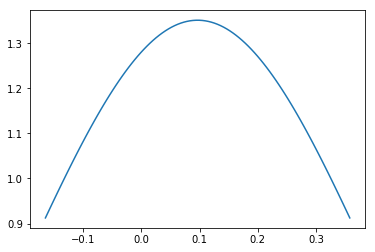

In [8]:
# Plotting white distribution
mu_white = float(mean_df_white)
x_white = np.linspace(mu_white-3*variance_white, mu_white+3*variance_white, 100)
plt.plot(x_white, mlab.normpdf(x_white, mu_white, std_dev_white))
plt.show()

In [9]:
# To determine the true population mean
# Two sample t test using the t statistic
population_mean = race_df.call.mean()
sample_size = math.sqrt(4870)
t_value_double = (mu_black - mu_white) / math.sqrt((variance_black / 2435) + (variance_white / 2435))
t_table_value_double = stats.t.ppf(.975, 4870)
if abs(t_value_double) > abs(t_table_value_double):
    print 'I am 95% confident that the difference in the callback rate for black and white sounding names are statistically significant'

I am 95% confident that the difference in the callback rate for black and white sounding names are statistically significant


In [10]:
mar_of_error = math.sqrt((.5*(1-.5))/4870)
confidence_interval = (mar_of_error*1.96)*100
mean_df_black_str = mean_df_black*100
print 'The Margin of Error is %s' % (mar_of_error)
print 'I am 95 percent confident that %s percent of blacks did get a callback plus or minus %s percent' % (mean_df_black_str, confidence_interval)

p_value = (mu_black - mu_white) / mar_of_error
print 'The p-value is %s assuming that there is no difference between the callback rate of black and white sounding names' % (p_value)

The Margin of Error is 0.00716482395169
I am 95 percent confident that 6.44763857126 percent of blacks did get a callback plus or minus 1.40430549453 percent
The p-value is -4.47085023596 assuming that there is no difference between the callback rate of black and white sounding names


I am 95% confident that there is a significant difference in the call backrate for blacks compared to whites. This can be expanded to show that 6.44 percent of blacks received a callback plus or minus 1.4 percent.

The analysis states that race is an important factor, however, in order to determine if it is the most important factor I would run an ordinary least squares regression to determine this.